# Assignment 8 Federated Learning

Name: Mariam Ashraf Mohamed

# CIFAR-10 (60000)

## Question 1
Load the CIFAR-10 dataset from PyTorch into dataloaders using a batch size of 16

Use PyTorch transforms to convert to tensor and normalize images to be in range [-1,1]

The CIFAR-10 dataset contains 60,000 colour images, each with dimensions 32x32px. The content of the images within the dataset is sampled from 10 classes.

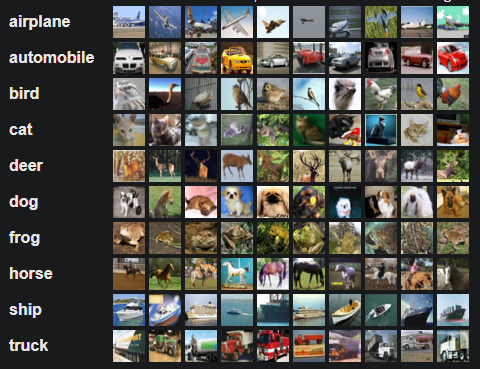

In [1]:
import numpy as np 
import pandas as pd
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch import nn
import matplotlib.pyplot as plt
import torch.optim as optim

In [2]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size = 16
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


## Question 2
Display **any** 10 images from the dataset in **one plot**

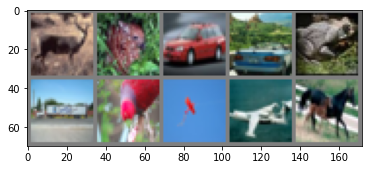

deer  deer  car   car   frog  truck bird  plane plane horse


In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[:10], nrow=5))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(10)))

## Question 3



### 3.1
Build the following neural net architecture using **PyTorch**:
- Conv2D with input channels 3 and output channels 32, kernel 3 and padding 1
- ReLU activation
- Conv2D with output channels 64, kernel 3, stride 1 and padding 1
- ReLU activation
- Max pooling kernel (2,2)
- Batch Norm

- Conv2D with output channels 128, kernel 3, stride 1 and padding 1
- ReLU activation
- Conv2D with output channels 128, kernel 3, stride 1 and padding 1
- ReLU activation
- Max pooling kernel (2,2)
- Batch Norm

- Conv2D with output channels 256, kernel 3, stride 1 and padding 1
- ReLU activation
- Conv2D with output channels 256, kernel 3, stride 1 and padding 1
- ReLU activation
- Max pooling kernel (2,2)
- Batch Norm 

- Flatten
- Linear layer: input 256x4x4, output 1024
- ReLU activation
- Linear layer: output 512
- ReLU activation
- Linear layer

In [3]:
class Cifar10CnnModel(nn.Module):
    def __init__(self):
        super(Cifar10CnnModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32,out_channels=64, kernel_size=3, padding=1, stride=1)
        self.conv3 = nn.Conv2d(in_channels=64,out_channels=128, kernel_size=3, padding=1, stride=1)
        self.conv4 = nn.Conv2d(in_channels=128,out_channels=128, kernel_size=3, padding=1, stride=1)
        self.conv5 = nn.Conv2d(in_channels=128,out_channels=256, kernel_size=3, padding=1, stride=1)
        self.conv6 = nn.Conv2d(in_channels=256,out_channels=256, kernel_size=3, padding=1, stride=1)
        self.fc1 = nn.Linear(in_features=256*4*4, out_features=1024)
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512,10)
        self.batchnorm1=nn.BatchNorm2d(64)
        self.batchnorm2=nn.BatchNorm2d(128)
        self.batchnorm3=nn.BatchNorm2d(256)
        
    def forward(self, xb: torch.Tensor) -> torch.Tensor:
        xb = F.relu(self.conv1(xb))
        xb = F.relu(self.conv2(xb))
        xb = F.max_pool2d(xb, 2, 2)
        xb = self.batchnorm1(xb)
        xb = F.relu(self.conv3(xb))
        xb = F.relu(self.conv4(xb))
        xb = F.max_pool2d(xb, 2, 2)
        xb = self.batchnorm2(xb)
        xb = F.relu(self.conv5(xb))
        xb = F.relu(self.conv6(xb))
        xb = F.max_pool2d(xb, 2, 2)
        xb = self.batchnorm3(xb)
        xb = xb.view(-1, 256*4*4)
        xb = F.relu(self.fc1(xb))
        xb = F.relu(self.fc2(xb))
        xb = self.fc3(xb)
        return F.log_softmax(xb, dim=1)

### 3.2
Use cross entropy loss and adam optimizer with learning rate 0.0005



In [4]:
model = Cifar10CnnModel()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr= 0.0005)

In [ ]:
print(model)                         # what does the object tell us about itself?

input = torch.rand(1, 3, 32, 32)   # stand-in for a 32x32 color image
print('\nImage batch shape:')
print(input.shape)

output = model(input)                # we don't call forward() directly
print('\nRaw output:')
print(output)
print(output.shape)

Cifar10CnnModel(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=4096, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (batchnorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

Image batch shape:
torch.Size([1, 

/usr/local/lib/python3.7/dist-packages/syft/frameworks/torch/tensors/interpreters/native.py:346: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  response = command_method(*args, **kwargs)


## Question 4
Train the network as we did in the tutorial for centralized learning

In [5]:
def train(net, trainloader, criterion, optimizer, epochs: int, verbose=False):
    """Train the network on the training set."""
    net.train()
    # for epoch in range(epochs):
        # correct, total, epoch_loss = 0, 0, 0.0
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward() # calculate the gradients
        optimizer.step() #  the optimizer performs one learning step - it uses the gradients from the backward() call to nudge the learning weights in the direction it thinks will reduce the loss.
        #     epoch_loss += loss
        #     total += labels.size(0)
        #     correct += (torch.max(outputs.data, 1)[1] == labels).sum().item()
        # epoch_loss /= len(testloader.dataset)
        # epoch_acc = correct / total2`
        # if verbose:
        #     print(f"Epoch {epoch+1}: train loss {epoch_loss}, accuracy {epoch_acc}")


def test(net, testloader, criterion):
    """Evaluate the network on the entire test set."""
    correct, total, loss = 0, 0, 0.0
    net.eval()
    with torch.no_grad():
        for images, labels in testloader:
            outputs = net(images)
            loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    loss /= len(testloader.dataset)
    accuracy = correct / total
    return loss, accuracy


In [6]:
for epoch in range(1,11):
    train(model, trainloader, criterion, optimizer, 1, True)
    loss, accuracy = test(model, testloader, criterion)
    print(f"Epoch {epoch}: validation loss {loss}, accuracy {accuracy}")

Epoch 1: validation loss 0.05082845898866654, accuracy 0.7146
Epoch 2: validation loss 0.04252016026526689, accuracy 0.772
Epoch 3: validation loss 0.04250797786526382, accuracy 0.7937
Epoch 4: validation loss 0.04051703264033422, accuracy 0.809
Epoch 5: validation loss 0.05432970196339302, accuracy 0.8143
Epoch 6: validation loss 0.04687151169823483, accuracy 0.8097
Epoch 7: validation loss 0.05763291561229853, accuracy 0.8141
Epoch 8: validation loss 0.051521255249832754, accuracy 0.8119
Epoch 9: validation loss 0.058217760387947785, accuracy 0.8097
Epoch 10: validation loss 0.06082057955661439, accuracy 0.8137


## Question 5
Federated learning

1. Build using syft a federated learning pipeline using **10** users/devices

2. Train a Cifar10CnnModel on the federated dataset

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


In [ ]:
# !pip install syft==0.2.3
# !pip install torch torchvision
import syft as sy

In [ ]:
hook = sy.TorchHook(torch)  # <-- NEW: hook PyTorch ie add extra functionalities to support Federated Learning
clients = []
for i in range(1,11):
  clients.append(sy.VirtualWorker(hook, id="C_"+str(i)))

In [ ]:
clients

[<VirtualWorker id:C_1 #objects:0>,
 <VirtualWorker id:C_2 #objects:0>,
 <VirtualWorker id:C_3 #objects:0>,
 <VirtualWorker id:C_4 #objects:0>,
 <VirtualWorker id:C_5 #objects:0>,
 <VirtualWorker id:C_6 #objects:0>,
 <VirtualWorker id:C_7 #objects:0>,
 <VirtualWorker id:C_8 #objects:0>,
 <VirtualWorker id:C_9 #objects:0>,
 <VirtualWorker id:C_10 #objects:0>]

In [ ]:
class Arguments():
    def __init__(self):
        self.batch_size = 64
        self.test_batch_size = 1000
        self.epochs = 10
        self.lr = 0.01
        self.momentum = 0.5
        self.no_cuda = False
        self.seed = 1
        self.log_interval = 10
        self.save_model = False

args = Arguments()

use_cuda = not args.no_cuda and torch.cuda.is_available()

torch.manual_seed(args.seed)

device = torch.device("cuda" if use_cuda else "cpu")

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

In [ ]:
federated_train_loader = sy.FederatedDataLoader( # <-- this is now a FederatedDataLoader 
    datasets.CIFAR10('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
    .federate((clients)), # <-- NEW: we distribute the dataset across all the workers, it's now a FederatedDataset
    batch_size=args.batch_size, shuffle=True, **kwargs)

test_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args.test_batch_size, shuffle=True, **kwargs)

Files already downloaded and verified


In [ ]:
def train(args, model, device, train_loader, optimizer,criterion, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(federated_train_loader): # <-- now it is a distributed dataset
        model.send(data.location) # <-- NEW: send the model to the right location
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        model.get() # <-- NEW: get the model back
        # if batch_idx % args.log_interval == 0:
        #     loss = loss.get() # <-- NEW: get the loss back
        #     print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        #         epoch, batch_idx * args.batch_size, len(train_loader) * args.batch_size, #batch_idx * len(data), len(train_loader.dataset),
        #         100. * batch_idx / len(train_loader), loss.item()))

In [ ]:
def test(args, model, device, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(1, keepdim=True) # get the index of the max log-probability 
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)

    # print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    #     test_loss, correct, len(test_loader.dataset),
    #     100. * correct / len(test_loader.dataset)))
    return test_loss,accuracy

In [ ]:
model = Cifar10CnnModel().to(device)
criterion = F.nll_loss
optimizer = optim.SGD(model.parameters(), lr=args.lr) # TODO momentum is not supported at the moment

train_loss = []
for epoch in range(1, args.epochs + 1):
    train(args, model, device, federated_train_loader, optimizer, criterion, epoch)
    loss, accuracy = test(args, model, device, test_loader,criterion)
    train_loss.append(loss)
    print(f"Epoch {epoch}: validation loss {loss}, accuracy {accuracy}")

if (args.save_model):
    torch.save(model.state_dict(), "Cifar10_cnn.pt")

Epoch 1: validation loss 2.3024086669921875, accuracy 10.0
Epoch 2: validation loss 2.3020228271484373, accuracy 10.0
Epoch 3: validation loss 2.3008280517578124, accuracy 12.31
Epoch 4: validation loss 2.2832869384765626, accuracy 10.93
Epoch 5: validation loss 2.1515159423828125, accuracy 22.03
Epoch 6: validation loss 1.969113037109375, accuracy 26.54
Epoch 7: validation loss 1.826341357421875, accuracy 35.1
Epoch 8: validation loss 1.7212880737304688, accuracy 37.96
Epoch 9: validation loss 1.7073226928710938, accuracy 38.9
Epoch 10: validation loss 1.8006715454101563, accuracy 37.04


## Question 6
Plot the loss vs epochs

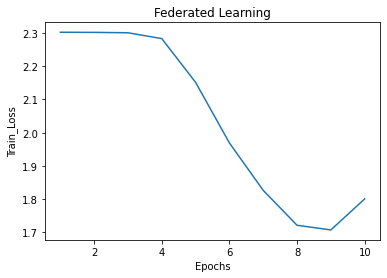

In [ ]:
epochs = np.arange(1,11,1)
plt.plot(epochs, train_loss)
plt.xlabel('Epochs')
plt.ylabel('Train_Loss')
plt.title('Federated Learning')
plt.show()